In [88]:
import cv2
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [89]:

class MNISTForGAN(Dataset):
    def __init__(self, root='./data', train=True, transform=None, download=True):
        # 원본 MNIST 데이터셋 로드
        self.mnist = datasets.MNIST(
            root=root,
            train=train,
            transform=transform,
            download=download
        )
        
    def __len__(self):
        return len(self.mnist)
    
    def __getitem__(self, idx):
        image, _ = self.mnist[idx]  # 원래 라벨은 무시
        
        # 이미지를 입력과 타겟 모두로 반환
        return image, image  # (입력, 타겟)

In [93]:
data_loader = torch.utils.data.DataLoader(MNISTForGAN(transform=transforms.ToTensor()),
                                          batch_size=4,
                                          shuffle=True,
                                         )

# Basic GAN

In [118]:
class BasicGAN(torch.nn.Module):
    def __init__(self, n_batch, image_size=28):
        super(BasicGAN, self).__init__()
        self.n_batch = n_batch
        self.image_size = image_size

        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(self.image_size ** 2, 200),
            torch.nn.LeakyReLU(0.1),
            torch.nn.Linear(200, 100),
            torch.nn.LeakyReLU(0.1),
            torch.nn.Linear(100, 30),
            torch.nn.LeakyReLU(0.1),
        )

        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(30, 100),
            torch.nn.LeakyReLU(0.1),
            torch.nn.Linear(100, 200),
            torch.nn.LeakyReLU(0.1),
            torch.nn.Linear(200, self.image_size ** 2),
            torch.nn.Sigmoid()
        )
    
    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.reshape((self.n_batch, 1, self.image_size, self.image_size))
        return x

    def predict(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.reshape((1, self.image_size, self.image_size))
        return x

model = BasicGAN(n_batch=4, image_size=28)

In [100]:
optimizer = torch.optim.NAdam(model.parameters(), lr=0.001)

In [101]:
"""Util function for training PyTorch Models.
"""

import torch

def train_model(model, train_loader, /, *, optimizer, loss_fn, num_epochs=25):
	for epoch in range(num_epochs):  # loop over the dataset multiple times
		running_loss = 0.0

		for i, data in enumerate(train_loader):
			inputs, labels = data

			optimizer.zero_grad()

			outputs = model(inputs)
			loss = loss_fn(outputs, labels)
			loss.backward()
			optimizer.step()

			running_loss += loss.item()
			if i % 2000 == 1999:    # print every 2000 mini-batches
				print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
				running_loss = 0.0

	print('Finished Training')

In [103]:
loss_fn = torch.nn.L1Loss()
train_model(model, data_loader, optimizer=optimizer, loss_fn=loss_fn, num_epochs=25)

[1,  2000] loss: 0.114
[1,  4000] loss: 0.074
[1,  6000] loss: 0.058
[1,  8000] loss: 0.052
[1, 10000] loss: 0.048
[1, 12000] loss: 0.046
[1, 14000] loss: 0.044
[2,  2000] loss: 0.042
[2,  4000] loss: 0.041
[2,  6000] loss: 0.040
[2,  8000] loss: 0.039
[2, 10000] loss: 0.039
[2, 12000] loss: 0.038
[2, 14000] loss: 0.038
[3,  2000] loss: 0.037
[3,  4000] loss: 0.036
[3,  6000] loss: 0.036
[3,  8000] loss: 0.036
[3, 10000] loss: 0.036
[3, 12000] loss: 0.035
[3, 14000] loss: 0.035
[4,  2000] loss: 0.034
[4,  4000] loss: 0.034
[4,  6000] loss: 0.034
[4,  8000] loss: 0.034
[4, 10000] loss: 0.034
[4, 12000] loss: 0.034
[4, 14000] loss: 0.033
[5,  2000] loss: 0.033
[5,  4000] loss: 0.033
[5,  6000] loss: 0.033
[5,  8000] loss: 0.033
[5, 10000] loss: 0.033
[5, 12000] loss: 0.032
[5, 14000] loss: 0.033
[6,  2000] loss: 0.032
[6,  4000] loss: 0.032
[6,  6000] loss: 0.032
[6,  8000] loss: 0.032
[6, 10000] loss: 0.032
[6, 12000] loss: 0.032
[6, 14000] loss: 0.032
[7,  2000] loss: 0.031
[7,  4000] 

In [110]:
        mnist = datasets.MNIST(
            root='./data',
            train=False,
            transform=transforms.ToTensor(),
            download=False
        )


In [119]:
data_loader = torch.utils.data.DataLoader(MNISTForGAN(transform=transforms.ToTensor()),
                                          batch_size=4,
                                          shuffle=True,
                                         )

In [149]:
for data, label in data_loader:
    print(data)
    predict = model(data)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

In [136]:
image = predict[0] 
import numpy as np
image_normalized = (image - image.min()) / (image.max() - image.min())

In [137]:
image_normalized

tensor([[[0.5156, 0.7511, 0.5154, 0.3944, 0.0985, 0.7325, 0.2991, 0.6579,
          0.3431, 0.6393, 0.4869, 0.3668, 0.3568, 0.4797, 0.6886, 0.4473,
          0.4712, 0.0566, 0.3472, 0.5486, 0.5051, 0.5518, 0.6183, 0.7950,
          0.7720, 0.4250, 0.2545, 0.5308],
         [0.4620, 0.3810, 0.3087, 0.3819, 0.7475, 0.4779, 0.6396, 0.5605,
          0.4264, 0.7677, 0.3760, 0.4206, 0.7845, 0.7676, 0.4942, 0.4620,
          0.4389, 0.2388, 0.3177, 0.3774, 0.5396, 0.2113, 0.2692, 0.5071,
          0.2775, 0.7617, 0.7936, 0.3671],
         [0.8745, 0.4771, 0.3568, 0.3244, 0.1755, 0.3903, 0.3208, 0.8022,
          0.2940, 0.6072, 0.3904, 0.2204, 0.6245, 0.5994, 0.3626, 0.3686,
          0.5585, 0.3525, 0.3675, 0.3761, 0.9227, 0.9151, 0.5200, 0.8239,
          0.3269, 0.7454, 0.5039, 0.3925],
         [0.3515, 0.3419, 0.5542, 0.6211, 0.7848, 0.4814, 0.5553, 0.5291,
          0.6064, 0.4860, 0.7342, 0.3591, 0.4412, 0.6515, 0.9549, 0.2638,
          0.2787, 0.7436, 0.4909, 0.2618, 0.6740, 0.6238,

In [140]:
!pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/d7/68/0d03098b3feb786cbd494df0aac15b571effda7f7cbdec267e8a8d398c16/matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a8/7e/cd93cab453720a5d6cb75588cc17dcdc08fc3484b9de98b885924ff61900/contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl (219 kB)



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [151]:
predict[0]

tensor([[[0.4990, 0.5148, 0.4996, 0.4912, 0.4714, 0.5159, 0.4853, 0.5094,
          0.4871, 0.5076, 0.4971, 0.4899, 0.4885, 0.4969, 0.5112, 0.4949,
          0.4960, 0.4695, 0.4893, 0.5021, 0.4996, 0.5024, 0.5078, 0.5187,
          0.5190, 0.4927, 0.4817, 0.4992],
         [0.4952, 0.4904, 0.4858, 0.4904, 0.5154, 0.4970, 0.5084, 0.5012,
          0.4926, 0.5166, 0.4891, 0.4923, 0.5185, 0.5164, 0.4988, 0.4938,
          0.4942, 0.4808, 0.4867, 0.4902, 0.5017, 0.4775, 0.4835, 0.4996,
          0.4841, 0.5164, 0.5190, 0.4905],
         [0.5244, 0.4963, 0.4892, 0.4865, 0.4762, 0.4905, 0.4859, 0.5180,
          0.4834, 0.5056, 0.4933, 0.4813, 0.5071, 0.5048, 0.4908, 0.4899,
          0.5029, 0.4899, 0.4896, 0.4907, 0.5276, 0.5248, 0.4993, 0.5217,
          0.4887, 0.5167, 0.4987, 0.4899],
         [0.4887, 0.4880, 0.5020, 0.5060, 0.5173, 0.4973, 0.5017, 0.5024,
          0.5073, 0.4991, 0.5146, 0.4879, 0.4934, 0.5091, 0.5320, 0.4820,
          0.4832, 0.5155, 0.4975, 0.4826, 0.5099, 0.5065,

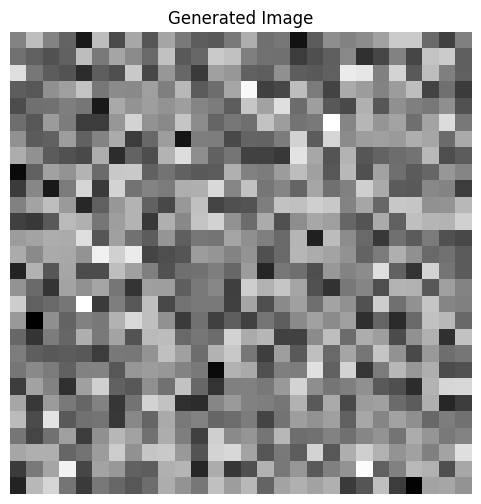

In [146]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.imshow(predict[1].detach().numpy()[0], cmap='gray')  # 흑백 이미지인 경우 cmap='gray' 사용
plt.axis('off')
plt.title('Generated Image')
plt.show()
